In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

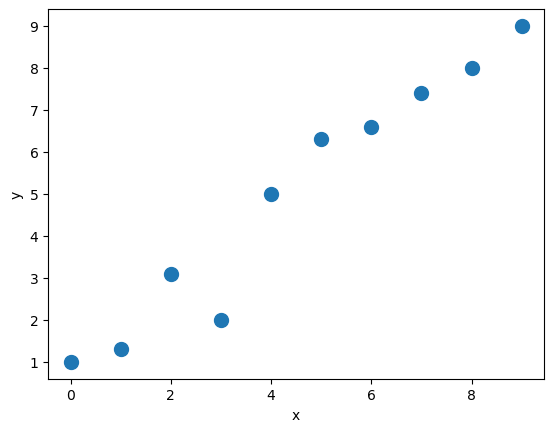

In [2]:
X_train = np.arange(10, dtype='float32').reshape((10, 1))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6, 
                    7.4, 8.0, 9.0], dtype='float32')

plt.plot(X_train, y_train, 'o', markersize=10)
plt.xlabel('x')
plt.ylabel('y')

plt.savefig('./Results/5_Dummy_Dataset.png')
plt.show()

Formula for normalizing a sample:
$$
z = \frac{x - \bar{x}}{\sigma}
$$
where, 
$z$ = Normalized Sample Value

$x$ = Sample Value

$\bar{x}$ = Mean of sample set 

$\sigma$ = Standard Deviation of sample set
       

In [3]:
from torch.utils.data import TensorDataset, DataLoader

X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm)
y_train = torch.from_numpy(y_train)
train_ds = TensorDataset(X_train_norm, y_train)
BATCH_SIZE = 1
train_dl = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True)

In [4]:
torch.manual_seed(1)
weight = torch.randn(1)
weight.requires_grad_()
bias = torch.zeros(1, requires_grad=True)

def model(xb):
    return xb @ weight + bias

In [5]:
def loss_fn(input, target):
    return (input - target).pow(2).mean()

In [6]:
learning_rate = 0.001
num_epochs = 200
log_epochs = 10
for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()
    with torch.no_grad():
        weight -= weight.grad * learning_rate
        bias -= bias.grad * learning_rate
        weight.grad.zero_()
        bias.grad.zero_()
    if epoch % log_epochs == 0:
        print(f'Epoch {epoch} Loss {loss.item():.4f}')

Epoch 0 Loss 46.5720
Epoch 10 Loss 27.1502
Epoch 20 Loss 1.6446
Epoch 30 Loss 14.4571
Epoch 40 Loss 11.7827
Epoch 50 Loss 6.4122
Epoch 60 Loss 0.6339
Epoch 70 Loss 3.1562
Epoch 80 Loss 2.0100
Epoch 90 Loss 0.3107
Epoch 100 Loss 0.7625
Epoch 110 Loss 1.0024
Epoch 120 Loss 0.0232
Epoch 130 Loss 0.5138
Epoch 140 Loss 0.0741
Epoch 150 Loss 1.8712
Epoch 160 Loss 0.0007
Epoch 170 Loss 0.0850
Epoch 180 Loss 0.0634
Epoch 190 Loss 0.0012


Final Parameters: 2.670930862426758 4.88258695602417


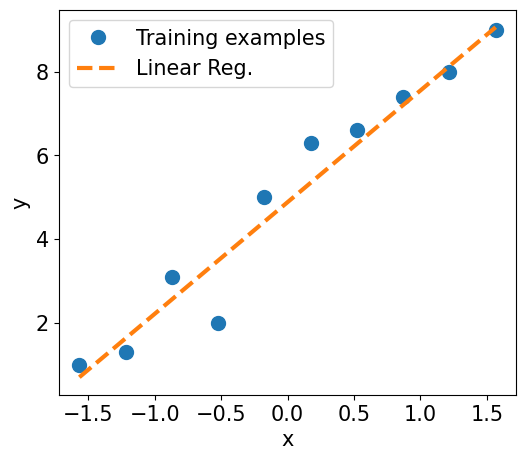

In [8]:
print('Final Parameters:', weight.item(), bias.item())
 
X_test = np.linspace(0, 9, num=100, dtype='float32').reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm)
y_pred = model(X_test_norm).detach().numpy()


fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Training examples', 'Linear Reg.'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
 
plt.savefig('./Results/6_Linear_Regression.png')

plt.show()